# Feature Extraction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load DataSet

In [2]:
data = pd.read_csv('data/HTTP-CSIC-2010.csv', low_memory=False)

In [3]:
data.describe()

,index,contentLength
count,223585.000000,100135.000000
mean,17183.743918,189.540430
std,9911.489433,105.627152
min,0.000000,4.000000
25%,8873.000000,70.000000
50%,17193.000000,244.000000
75%,24117.000000,261.000000
max,35999.000000,836.000000


In [4]:
data

,index,method,url,protocol,userAgent,pragma,cacheControl,accept,acceptEncoding,acceptCharset,acceptLanguage,host,connection,contentLength,contentType,cookie,payload,label
0,0,GET,http://localhost:8080/tienda1/publico/anadir.jsp,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,NaN,NaN,JSESSIONID=B92A8B48B9008CD29F622A994E0F650D,id=2,anom
1,0,GET,http://localhost:8080/tienda1/publico/anadir.jsp,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,NaN,NaN,JSESSIONID=B92A8B48B9008CD29F622A994E0F650D,nombre=Jam%F3n+Ib%E9rico,anom
2,0,GET,http://localhost:8080/tienda1/publico/anadir.jsp,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,NaN,NaN,JSESSIONID=B92A8B48B9008CD29F622A994E0F650D,precio=85,anom
3,0,GET,http://localhost:8080/tienda1/publico/anadir.jsp,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,NaN,NaN,JSESSIONID=B92A8B48B9008CD29F622A994E0F650D,cantidad=%27%3B+DROP+TABLE+usuarios%3B+SELECT+...,anom
4,0,GET,http://localhost:8080/tienda1/publico/anadir.jsp,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,NaN,NaN,JSESSIONID=B92A8B48B9008CD29F622A994E0F650D,B1=A%F1adir+al+carrito,anom
5,1,GET,http://localhost:8080/tienda1/publico/anadir.jsp,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,NaN,NaN,JSESSIONID=F563B5262843F12ECAE41815ABDEEA54,id=2%2F,anom
6,1,GET,http://localhost:8080/tienda1/publico/anadir.jsp,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,NaN,NaN,JSESSIONID=F563B5262843F12ECAE41815ABDEEA54,nombre=Jam%F3n+Ib%E9rico,anom
7,1,GET,http://localhost:8080/tienda1/publico/anadir.jsp,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,NaN,NaN,JSESSIONID=F563B5262843F12ECAE41815ABDEEA54,precio=85,anom
8,1,GET,http://localhost:8080/tienda1/publico/anadir.jsp,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,NaN,NaN,JSESSIONID=F563B5262843F12ECAE41815ABDEEA54,cantidad=49,anom
9,1,GET,http://localhost:8080/tienda1/publico/anadir.jsp,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,NaN,NaN,JSESSIONID=F563B5262843F12ECAE41815ABDEEA54,B1=A%F1adir+al+carrito,anom


## Unloss Data Preprocess

These Process will not loss any information compare with origin data

### Remove unique feature

If the value is same for every data, Then there is no Information in the Column
Remove the **unique** feature for every request.

In [5]:
univalue = data.nunique()

Text(0.5, 1.0, 'Unique Values')

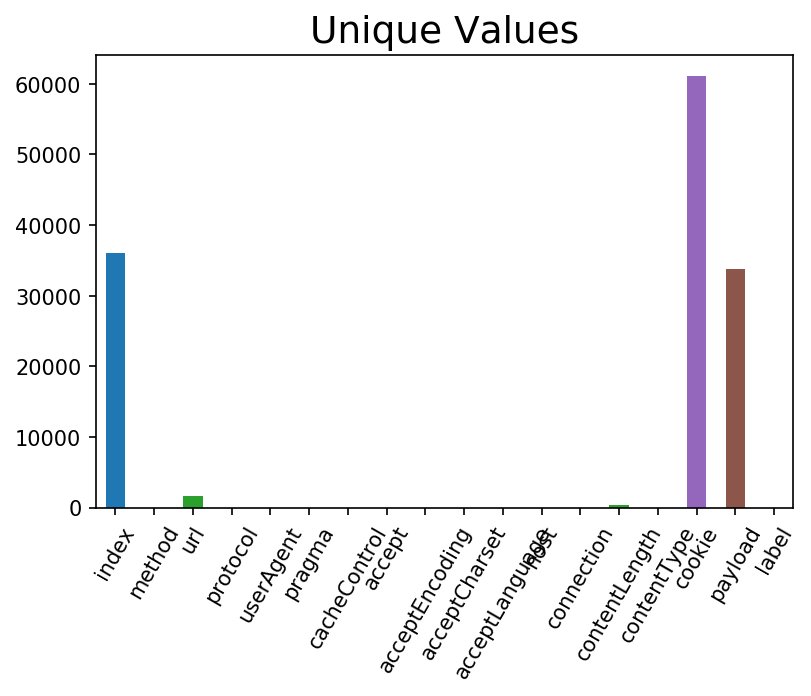

In [28]:
plt.figure(dpi=150)
univalue.plot(kind="bar",rot=60)
plt.title("Unique Values", fontsize= 18)

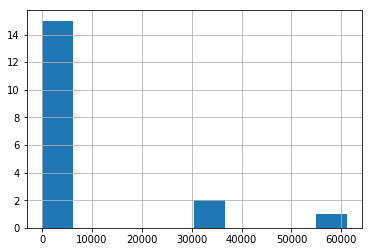

In [13]:
plt.figure()
univalue.hist()
plt.xlabel(plt)

In [6]:
data = data.loc[:, ("index","method","url","host","contentLength","cookie","payload","label")]

In [7]:
data.nunique()

index            36000
method               3
url               1643
host                 2
contentLength      382
cookie           61065
payload          33769
label                2
dtype: int64

### Take out argument

1. Take out column ``payload``  for separately process.

2. Remove redundant Data for other Columns

In [8]:
payload = data.loc[:,("index", "payload","label")]
data = data.loc[:, ("index","method","url","host","contentLength","cookie","label")]

In [9]:
payload.head()

,index,payload,label
0,0,id=2,anom
1,0,nombre=Jam%F3n+Ib%E9rico,anom
2,0,precio=85,anom
3,0,cantidad=%27%3B+DROP+TABLE+usuarios%3B+SELECT+...,anom
4,0,B1=A%F1adir+al+carrito,anom


In [10]:
data.head()

,index,method,url,host,contentLength,cookie,label
0,0,GET,http://localhost:8080/tienda1/publico/anadir.jsp,localhost:8080,NaN,JSESSIONID=B92A8B48B9008CD29F622A994E0F650D,anom
1,0,GET,http://localhost:8080/tienda1/publico/anadir.jsp,localhost:8080,NaN,JSESSIONID=B92A8B48B9008CD29F622A994E0F650D,anom
2,0,GET,http://localhost:8080/tienda1/publico/anadir.jsp,localhost:8080,NaN,JSESSIONID=B92A8B48B9008CD29F622A994E0F650D,anom
3,0,GET,http://localhost:8080/tienda1/publico/anadir.jsp,localhost:8080,NaN,JSESSIONID=B92A8B48B9008CD29F622A994E0F650D,anom
4,0,GET,http://localhost:8080/tienda1/publico/anadir.jsp,localhost:8080,NaN,JSESSIONID=B92A8B48B9008CD29F622A994E0F650D,anom


Remove redundant Data for other Columns

In [11]:
data = data.drop_duplicates()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61065 entries, 0 to 223572
Data columns (total 7 columns):
index            61065 non-null int64
method           61065 non-null object
url              61065 non-null object
host             61065 non-null object
contentLength    17977 non-null float64
cookie           61065 non-null object
label            61065 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 2.6+ MB


### Data-to-Int for descrete data

Replace the columns wich has distinct descrete values.

In [13]:
data.nunique()

index            36000
method               3
url               1643
host                 2
contentLength      382
cookie           61065
label                2
dtype: int64

$$
method=\begin{cases}
1 ,\quad GET \\
2 ,\quad POST \\
3 ,\quad PUT
\end{cases}
$$

In [14]:
data.method.unique()

array(['GET', 'POST', 'PUT'], dtype=object)

In [15]:
data = data.replace(["GET", "POST", "PUT"], [1, 2, 3])

In [16]:
data.method.unique()

array([1, 2, 3], dtype=int64)

$$
method=\begin{cases}
0 ,\quad localhost:8080 \\
1 ,\quad localhost:9090 
\end{cases}
$$

In [17]:
data["host"].unique()

array(['localhost:8080', 'localhost:9090'], dtype=object)

In [18]:
data  = data.copy()
data["host"].replace(['localhost:8080', 'localhost:9090'], [0,1], inplace=True)

In [19]:
data["host"].unique()

array([0, 1], dtype=int64)

$$
label=\begin{cases}
0 ,\quad norm \\
1 ,\quad anom
\end{cases}
$$

In [20]:
data = data.replace({"norm":0, "anom":1})

In [21]:
data.head()

,index,method,url,host,contentLength,cookie,label
0,0,1,http://localhost:8080/tienda1/publico/anadir.jsp,0,NaN,JSESSIONID=B92A8B48B9008CD29F622A994E0F650D,1
5,1,1,http://localhost:8080/tienda1/publico/anadir.jsp,0,NaN,JSESSIONID=F563B5262843F12ECAE41815ABDEEA54,1
10,2,1,http://localhost:8080/asf-logo-wide.gif~,0,NaN,JSESSIONID=51A7470173188BBB993947F2283059E4,1
11,3,1,http://localhost:8080/tienda1/publico/autentic...,0,NaN,JSESSIONID=AC0EEEDD09663CB36C67DD1B787B0CF5,1
16,4,1,http://localhost:8080/tienda1/publico/autentic...,0,NaN,JSESSIONID=0FCF23BE3D0EB007F5289208CE069EAA,1


### NaN processing

Replace NaN in ``contentLength`` as 0(int), and NaN in ``payload`` with "".

In [22]:
data.isnull().sum()

index                0
method               0
url                  0
host                 0
contentLength    43088
cookie               0
label                0
dtype: int64

In [23]:
data.loc[:,"contentLength"] = data["contentLength"].fillna(value=0)

In [24]:
data.isnull().sum()

index            0
method           0
url              0
host             0
contentLength    0
cookie           0
label            0
dtype: int64

Payload NaN data

In [25]:
payload.isnull().sum()

index          0
payload    25491
label          0
dtype: int64

In [26]:
payload.loc[:,"payload"] = payload["payload"].fillna(value="")

In [27]:
payload.isnull().sum()

index      0
payload    0
label      0
dtype: int64

In [28]:
data

,index,method,url,host,contentLength,cookie,label
0,0,1,http://localhost:8080/tienda1/publico/anadir.jsp,0,0.0,JSESSIONID=B92A8B48B9008CD29F622A994E0F650D,1
5,1,1,http://localhost:8080/tienda1/publico/anadir.jsp,0,0.0,JSESSIONID=F563B5262843F12ECAE41815ABDEEA54,1
10,2,1,http://localhost:8080/asf-logo-wide.gif~,0,0.0,JSESSIONID=51A7470173188BBB993947F2283059E4,1
11,3,1,http://localhost:8080/tienda1/publico/autentic...,0,0.0,JSESSIONID=AC0EEEDD09663CB36C67DD1B787B0CF5,1
16,4,1,http://localhost:8080/tienda1/publico/autentic...,0,0.0,JSESSIONID=0FCF23BE3D0EB007F5289208CE069EAA,1
21,5,1,http://localhost:8080/tienda1/publico/autentic...,0,0.0,JSESSIONID=09BF818C8B6E9EFE9DF5F28745D5948B,1
26,6,1,http://localhost:8080/tienda1/publico/caracter...,0,0.0,JSESSIONID=7FD36920003C837664CF0EF535DC10B9,1
27,7,1,http://localhost:8080/tienda1/publico/entrar.jsp,0,0.0,JSESSIONID=ACB274547804B328DC6E8A6437B330B9,1
28,8,1,http://localhost:8080/tienda1/publico/entrar.jsp,0,0.0,JSESSIONID=C0E8CC9BE76123330EEEC0896621D656,1
29,9,1,http://localhost:8080/IISSamples/sdk/asp/appli...,0,0.0,JSESSIONID=7A7810BAEDA706C77CC9C2F19311BFB5,1


## Lossful Process

These process will loss some Information in origin data.
### Replace With length

Replace ``url`` and ``cookie`` with it's length

add New feature : **Special Chars in url**

#### Add Feature : Number of digits in path

In [29]:
url = data["url"]
data.insert(3,"digit_path", url.str.count(r'[0-9]')) # add New feature number of special chars in url

#### Add Feature: Special Chars in path. 

"Special" chars  means that characters that has special meaning in several programing language.

In [30]:
data.insert(3,"special_path", url.str.count(r'[^a-zA-Z\d\s\/:\.]')) # add New feature number of special chars in url

In [31]:
data.head()

,index,method,url,special_path,digit_path,host,contentLength,cookie,label
0,0,1,http://localhost:8080/tienda1/publico/anadir.jsp,0,5,0,0.0,JSESSIONID=B92A8B48B9008CD29F622A994E0F650D,1
5,1,1,http://localhost:8080/tienda1/publico/anadir.jsp,0,5,0,0.0,JSESSIONID=F563B5262843F12ECAE41815ABDEEA54,1
10,2,1,http://localhost:8080/asf-logo-wide.gif~,3,4,0,0.0,JSESSIONID=51A7470173188BBB993947F2283059E4,1
11,3,1,http://localhost:8080/tienda1/publico/autentic...,0,5,0,0.0,JSESSIONID=AC0EEEDD09663CB36C67DD1B787B0CF5,1
16,4,1,http://localhost:8080/tienda1/publico/autentic...,0,5,0,0.0,JSESSIONID=0FCF23BE3D0EB007F5289208CE069EAA,1


#### Add Feature: Non-alphanumaric characters

In [32]:
data.insert(4,"non_an_path", url.str.count(r'[^a-zA-Z\d\s]')) # add New feature number of Non-alphanumaric characters

In [33]:
data.head()

,index,method,url,special_path,non_an_path,digit_path,host,contentLength,cookie,label
0,0,1,http://localhost:8080/tienda1/publico/anadir.jsp,0,8,5,0,0.0,JSESSIONID=B92A8B48B9008CD29F622A994E0F650D,1
5,1,1,http://localhost:8080/tienda1/publico/anadir.jsp,0,8,5,0,0.0,JSESSIONID=F563B5262843F12ECAE41815ABDEEA54,1
10,2,1,http://localhost:8080/asf-logo-wide.gif~,3,9,4,0,0.0,JSESSIONID=51A7470173188BBB993947F2283059E4,1
11,3,1,http://localhost:8080/tienda1/publico/autentic...,0,8,5,0,0.0,JSESSIONID=AC0EEEDD09663CB36C67DD1B787B0CF5,1
16,4,1,http://localhost:8080/tienda1/publico/autentic...,0,8,5,0,0.0,JSESSIONID=0FCF23BE3D0EB007F5289208CE069EAA,1


#### Add Feature: Length of path

In [34]:
# data.loc[:,'cookie'] = data['cookie'].str.len() # length of cookies
data.loc[:,'url'] = data['url'].str.len() # length of urls

In [35]:
data.head()

,index,method,url,special_path,non_an_path,digit_path,host,contentLength,cookie,label
0,0,1,48,0,8,5,0,0.0,JSESSIONID=B92A8B48B9008CD29F622A994E0F650D,1
5,1,1,48,0,8,5,0,0.0,JSESSIONID=F563B5262843F12ECAE41815ABDEEA54,1
10,2,1,40,3,9,4,0,0.0,JSESSIONID=51A7470173188BBB993947F2283059E4,1
11,3,1,52,0,8,5,0,0.0,JSESSIONID=AC0EEEDD09663CB36C67DD1B787B0CF5,1
16,4,1,52,0,8,5,0,0.0,JSESSIONID=0FCF23BE3D0EB007F5289208CE069EAA,1


Change the Name of Features  
url == > url_length  
cookie ==> cookie_length

In [36]:
data = data.rename(columns={"url":"url_length", "cookie":"cookie_length"})

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61065 entries, 0 to 223572
Data columns (total 10 columns):
index            61065 non-null int64
method           61065 non-null int64
url_length       61065 non-null int64
special_path     61065 non-null int64
non_an_path      61065 non-null int64
digit_path       61065 non-null int64
host             61065 non-null int64
contentLength    61065 non-null float64
cookie_length    61065 non-null object
label            61065 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 4.9+ MB


In [38]:
data = data.set_index("index")

In [40]:
data.head()

,method,url_length,special_path,non_an_path,digit_path,host,contentLength,cookie_length,label
index,,,,,,,,,
0,1,48,0,8,5,0,0.0,JSESSIONID=B92A8B48B9008CD29F622A994E0F650D,1
1,1,48,0,8,5,0,0.0,JSESSIONID=F563B5262843F12ECAE41815ABDEEA54,1
2,1,40,3,9,4,0,0.0,JSESSIONID=51A7470173188BBB993947F2283059E4,1
3,1,52,0,8,5,0,0.0,JSESSIONID=AC0EEEDD09663CB36C67DD1B787B0CF5,1
4,1,52,0,8,5,0,0.0,JSESSIONID=0FCF23BE3D0EB007F5289208CE069EAA,1


### Drop cookie length

In [41]:
data = data.drop(columns=["cookie_length"])

### Data Separate

Separate the data according to The label Where:

$$
label=\begin{cases}
0 ,\quad norm \\
1 ,\quad anom
\end{cases}
$$

In [42]:
norm = data[data["label"] == 0]
anom = data[data["label"] == 1]

In [43]:
norm.describe()

,method,url_length,special_path,non_an_path,digit_path,host,contentLength,label
count,36000.000000,36000.000000,36000.0,36000.000000,36000.000000,36000.0,36000.000000,36000.0
mean,1.222222,49.416667,0.0,8.055556,5.083333,0.0,20.347056,0.0
std,0.415745,4.192479,0.0,0.328676,0.276389,0.0,59.007596,0.0
min,1.000000,39.000000,0.0,7.000000,5.000000,0.0,0.000000,0.0
25%,1.000000,47.750000,0.0,8.000000,5.000000,0.0,0.000000,0.0
50%,1.000000,48.000000,0.0,8.000000,5.000000,0.0,0.000000,0.0
75%,1.000000,50.250000,0.0,8.000000,5.000000,0.0,0.000000,0.0
max,2.000000,58.000000,0.0,9.000000,6.000000,0.0,307.000000,0.0


In [44]:
anom.describe()

,method,url_length,special_path,non_an_path,digit_path,host,contentLength,label
count,25065.000000,25065.000000,25065.000000,25065.000000,25065.000000,25065.000000,25065.000000,25065.0
mean,1.413884,50.094794,0.141831,8.160064,5.670816,0.015839,48.583004,1.0
std,0.523710,7.198307,0.511236,1.077877,3.668023,0.124854,92.064298,0.0
min,1.000000,22.000000,0.000000,5.000000,4.000000,0.000000,0.000000,1.0
25%,1.000000,48.000000,0.000000,8.000000,5.000000,0.000000,0.000000,1.0
50%,1.000000,49.000000,0.000000,8.000000,5.000000,0.000000,0.000000,1.0
75%,2.000000,52.000000,0.000000,8.000000,5.000000,0.000000,62.000000,1.0
max,3.000000,87.000000,4.000000,15.000000,25.000000,1.000000,836.000000,1.0


### Process payload

Add 4 Feature here

- Length of arguments
- Number of arguments
- Number of digits in arguments
- Number of letters in arguments

In [45]:
arg_anom = payload[payload['label'] == "anom"].loc[:, ("index", "payload")]
arg_norm = payload[payload['label'] == "norm"].loc[:, ("index", "payload")]

In [46]:
arg_anom.head()

,index,payload
0,0,id=2
1,0,nombre=Jam%F3n+Ib%E9rico
2,0,precio=85
3,0,cantidad=%27%3B+DROP+TABLE+usuarios%3B+SELECT+...
4,0,B1=A%F1adir+al+carrito


In [47]:
grouped_norm = arg_norm.groupby("index")
grouped_anom = arg_anom.groupby("index")

In [48]:
anom.insert(5, "arg_length", grouped_anom.sum()["payload"].str.len())
norm.insert(5, "arg_length", grouped_norm.sum()["payload"].str.len())

In [49]:
norm.head()

,method,url_length,special_path,non_an_path,digit_path,arg_length,host,contentLength,label
index,,,,,,,,,
0,1,39,0,7,5,0,0,0.0,0
1,1,48,0,8,5,64,0,0.0,0
2,1,52,0,8,5,59,0,0.0,0
3,1,57,0,8,5,4,0,0.0,0
4,1,49,0,8,5,0,0,0.0,0


Number of arguments

In [50]:
anom.insert(6, "arg_num" , grouped_anom.size())
norm.insert(6, "arg_num" , grouped_norm.size())

In [51]:
anom.head()

,method,url_length,special_path,non_an_path,digit_path,arg_length,arg_num,host,contentLength,label
index,,,,,,,,,,
0,1,48,0,8,5,142,5,0,0.0,1
1,1,48,0,8,5,73,5,0,0.0,1
2,1,40,3,9,4,0,1,0,0.0,1
3,1,52,0,8,5,114,5,0,0.0,1
4,1,52,0,8,5,65,5,0,0.0,1


Number of digits in arguments

In [52]:
arg_sum_anom = grouped_anom.sum()
arg_sum_norm = grouped_norm.sum()

### Save data

In [53]:
arg_sum_anom.to_csv("data/arg_sum_anom.csv", index=False)
arg_sum_norm.to_csv("data/arg_sum_norm.csv", index=False)

In [54]:
arg_sum_anom.head()

,payload
index,
0,id=2nombre=Jam%F3n+Ib%E9ricoprecio=85cantidad=...
1,id=2%2Fnombre=Jam%F3n+Ib%E9ricoprecio=85cantid...
2,
3,modo=entrarlogin=bob%40%3CSCRipt%3Ealert%28Par...
4,modo=entrarlogin=grimshawpwd=G%2F%2FlAc%2CIArr...


In [55]:
arg_sum_anom.iloc[0,0]

'id=2nombre=Jam%F3n+Ib%E9ricoprecio=85cantidad=%27%3B+DROP+TABLE+usuarios%3B+SELECT+*+FROM+datos+WHERE+nombre+LIKE+%27%25B1=A%F1adir+al+carrito'

In [56]:
anom.insert(7,"digit_in_arg", arg_sum_anom["payload"].str.count(r'[0-9]'))
norm.insert(7,"digit_in_arg", arg_sum_norm["payload"].str.count(r'[0-9]'))

In [57]:
anom.head()

,method,url_length,special_path,non_an_path,digit_path,arg_length,arg_num,digit_in_arg,host,contentLength,label
index,,,,,,,,,,,
0,1,48,0,8,5,142,5,15,0,0.0,1
1,1,48,0,8,5,73,5,10,0,0.0,1
2,1,40,3,9,4,0,1,0,0,0.0,1
3,1,52,0,8,5,114,5,18,0,0.0,1
4,1,52,0,8,5,65,5,4,0,0.0,1


Number of letters in arguments

In [58]:
anom.insert(8,"letter_in_arg", arg_sum_anom["payload"].str.count(r'[a-zA-Z]'))
norm.insert(8,"letter_in_arg", arg_sum_norm["payload"].str.count(r'[a-zA-Z]'))

## Save data

Now Save The dataset in file

In [61]:
anom.to_csv("data/anom.csv", index=False)
norm.to_csv("data/norm.csv", index=False)

## Combine anom and norm

In [62]:
total = anom.append(norm) # combine anom and norm
total = total.reset_index(drop=True) # Reset Index

In [63]:
total.to_csv("data/total.csv", index=False)

In [67]:
total.head()

,method,url_length,special_path,non_an_path,digit_path,arg_length,arg_num,digit_in_arg,letter_in_arg,host,contentLength,label
0,1,48,0,8,5,142,5,15,99,0,0.0,1
1,1,48,0,8,5,73,5,10,51,0,0.0,1
2,1,40,3,9,4,0,1,0,0,0,0.0,1
3,1,52,0,8,5,114,5,18,81,0,0.0,1
4,1,52,0,8,5,65,5,4,53,0,0.0,1


## Features
    
Now There are 9 features in out dataFrame:

1. Method
2. Length of path
3. Number of Special characters in path
4. Number of non-alphanumaric characters in path
5. Number of digit in path
6. Length of arguments
7. Number of arguments
8. Number of Digit in arguments
9. Number of Letters in arguments
10. Host
11. Length of Content

## Shuffle the data

In [68]:
total = total.sample(frac=1).reset_index(drop=True)

## Split Train and test

In [69]:
train = total.iloc[:51065]
test = total.iloc[51065:].reset_index(drop=True)

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51065 entries, 0 to 51064
Data columns (total 12 columns):
method           51065 non-null int64
url_length       51065 non-null int64
special_path     51065 non-null int64
non_an_path      51065 non-null int64
digit_path       51065 non-null int64
arg_length       51065 non-null int64
arg_num          51065 non-null int64
digit_in_arg     51065 non-null int64
letter_in_arg    51065 non-null int64
host             51065 non-null int64
contentLength    51065 non-null float64
label            51065 non-null int64
dtypes: float64(1), int64(11)
memory usage: 4.7 MB


In [71]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
method           10000 non-null int64
url_length       10000 non-null int64
special_path     10000 non-null int64
non_an_path      10000 non-null int64
digit_path       10000 non-null int64
arg_length       10000 non-null int64
arg_num          10000 non-null int64
digit_in_arg     10000 non-null int64
letter_in_arg    10000 non-null int64
host             10000 non-null int64
contentLength    10000 non-null float64
label            10000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 937.5 KB


## Split Features and label

In [72]:
train.columns

Index(['method', 'url_length', 'special_path', 'non_an_path', 'digit_path',
       'arg_length', 'arg_num', 'digit_in_arg', 'letter_in_arg', 'host',
       'contentLength', 'label'],
      dtype='object')

In [73]:
x_train = train.loc[:, train.columns.values[:-1]]
y_train = train.loc[:, 'label']
x_test = test.loc[:, test.columns.values[:-1]]
y_test = test.loc[:,'label']

In [74]:
y_test.values.shape

(10000,)

In [75]:
x_train.values.shape

(51065, 11)

## Save Datasets

In [76]:
x_train.to_csv("data/x_train.csv", index=False)
y_train.to_csv("data/y_train.csv", index=False)
x_test.to_csv("data/x_test.csv", index=False)
y_test.to_csv("data/y_test.csv", index=False)